In [1]:
import sys

import sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Dataset-а е от: https://www.kaggle.com/c/santander-customer-satisfaction
# Става въпрос за задоволеност на някакви клиенти... засега няма и да се интересувам от повече

pd.options.display.max_rows = 12
train = pd.read_csv('./train.csv.zip')
train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76014,151825,2,39,0.0,375.99,405.33,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90214.170000,0
76015,151829,2,48,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0


In [3]:
# Виждам че ID е индексиращата колона: задавам я като такава

train = train.set_index('ID')

In [4]:
# Да направим примерен класификатор и да измерим колко добре се справя спрямо area under ROC curve
# Ще пробвам с логистична регресия

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

x = train.drop('TARGET', axis=1)
y = train['TARGET']
result = cross_validate(LogisticRegression(), x, y, cv=3, n_jobs=3, return_train_score=True)
print(result['test_score'], result['train_score'])
result = cross_validate(LogisticRegression(), x, y, cv=3, n_jobs=3, return_train_score=True, scoring='roc_auc')
print(result['test_score'], result['train_score'])

[ 0.96041987  0.96041831  0.96045621] [ 0.96043726  0.96043804  0.96041909]
[ 0.60540107  0.61300456  0.59241256] [ 0.60118209  0.60174555  0.60743343]


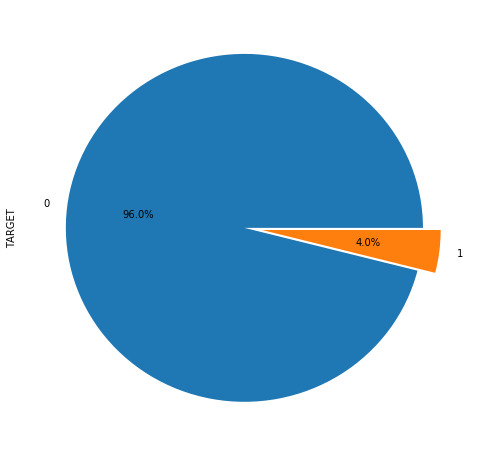

In [5]:
# Изглежда зле, да видим разпределението на доволни и недоволни клиенти

y.value_counts().plot.pie(explode=[0, 0.1], figsize=(8, 8), autopct='%1.1f%%')

In [6]:
# Accuracy-то ми на практика е еквивалентно на това просто да отговарям с 0...
# Не пречи да проверя и с RandomForest

from sklearn.ensemble import RandomForestClassifier

result = cross_validate(RandomForestClassifier(), x, y, cv=3, n_jobs=3, return_train_score=True)
print(result['test_score'], result['train_score'])
result = cross_validate(RandomForestClassifier(), x, y, cv=3, n_jobs=3, return_train_score=True, scoring='roc_auc')
print(result['test_score'], result['train_score'])

[ 0.95477684  0.95323599  0.95354986] [ 0.98902899  0.9886543   0.98869399]
[ 0.67462687  0.66709052  0.69039535] [ 0.99654386  0.99630334  0.99660908]


In [7]:
# Overfit-ва много, но все някак резултатите са по-добри от предните
# Ще разгледам данните спрямо различни параметри
# Самите колони имат произволни имена, но на пръв поглед има много 0-ли

print(train.shape)
zeros = train.apply(lambda column: column.apply(lambda x: x==0)).sum().sort_values()
zeros

(76020, 370)


var38                  0
var15                  0
var3                  75
num_var30_0          343
ind_var30_0          343
var36                411
                   ...  
saldo_var2_ult1    76020
num_var46_0        76020
ind_var41          76020
num_var41          76020
ind_var46          76020
saldo_var27        76020
Length: 370, dtype: int64

In [8]:
# Забелязвам че има много колони в които има единствено 0-ли... странно
# Тези колони само ще ми бавят алгоритмите които тренирам.
# Ще ги премахна.

zero_columns = []
for x in zeros.iteritems():
    if (x[1] == train.shape[0]): zero_columns.append(x[0])

zero_columns

['saldo_medio_var13_medio_hace3',
 'num_var28_0',
 'num_var27_0',
 'num_var28',
 'num_var27',
 'imp_amort_var18_hace3',
 'ind_var46_0',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'ind_var27',
 'ind_var28',
 'ind_var28_0',
 'ind_var27_0',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'saldo_var46',
 'saldo_var41',
 'saldo_var28',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_var46',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'ind_var2',
 'ind_var2_0',
 'saldo_var2_ult1',
 'num_var46_0',
 'ind_var41',
 'num_var41',
 'ind_var46',
 'saldo_var27']

In [9]:
train.drop(zero_columns, axis=1)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.00,195.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
13,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151825,2,39,0.0,375.99,405.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90214.170000,0
151829,2,48,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0


In [10]:
# Ще се фокусирам върху feature-ите с малък брой 0-ли
zeros[:10]

var38             0
var15             0
var3             75
num_var30_0     343
ind_var30_0     343
var36           411
num_var42_0     436
ind_var5_0     3191
num_var5_0     3191
num_var39_0    9065
dtype: int64

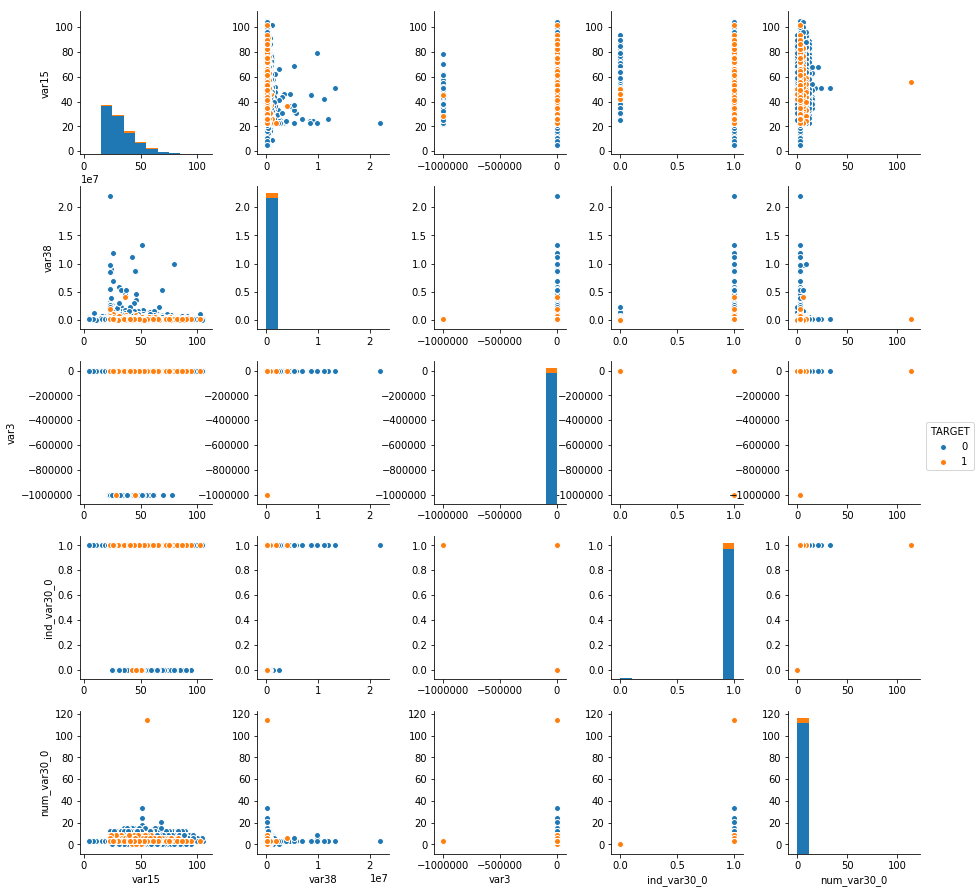

In [11]:
# Ще пробвам с pairplot над първите 5 feature-а от по-горе (без ID естествено)

sns.pairplot(train, hue='TARGET', vars=['var15', 'var38', 'var3', 'ind_var30_0', 'num_var30_0'])

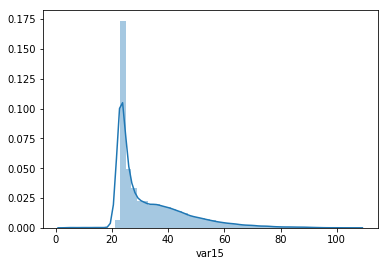

In [12]:
# Изглежда сякаш от var15, var38 и num_var30_0 могат да носят информация (макар и да не изглежда особено обещаващо)
# Да разгледаме дистрибуциите им.

sns.distplot(train['var15'])

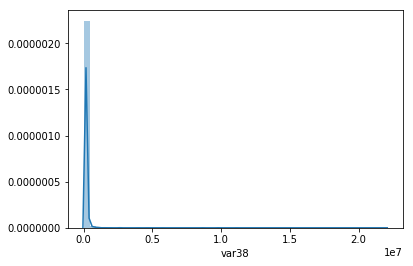

In [13]:
sns.distplot(train['var38'])

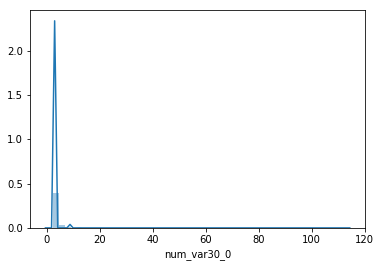

In [14]:
sns.distplot(train['num_var30_0'])

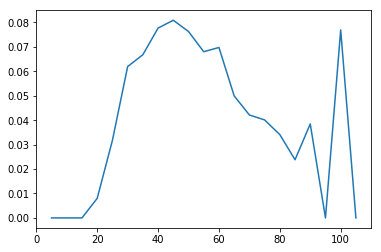

In [15]:
# Към момента сякаш само във var15 има нещо полезно
# Ще направя допълнителен анализ на var15
var15 = train[['var15', 'TARGET']].copy()
var15['var15'] = var15.var15.apply(lambda x: x//5*5)
plt.plot(var15.groupby('var15').mean())

In [16]:
# Като вземем предвид и дистрибуцията преди малко изглежда сякаш около 45 шанса е 2но на 4% които имаме отначало,
# а пък около 20 шанса е 2но под началните 4%.
# Т.е. можем да отделим feature-и подобни на около 20 ли е и около 45 ли е.
# Естествено това би помогнало само на методи като логистичната регресия, а не на RandomForest.
# Все пак нека видим какво ще стане.

modified = train.copy()
modified['small15'] = modified['var15'].apply(lambda x: x<25)
modified['medium15'] = modified['var15'].apply(lambda x: x<65 and x>30)
modified = modified.drop('var15', axis=1)

In [17]:
# Да пуснем логистична регресия

x = modified.drop('TARGET', axis=1)
y = modified['TARGET']
result = cross_validate(LogisticRegression(), x, y, cv=3, n_jobs=3, return_train_score=True)
print(result['test_score'], result['train_score'])
result = cross_validate(LogisticRegression(), x, y, cv=3, n_jobs=3, return_train_score=True, scoring='roc_auc')
print(result['test_score'], result['train_score'])

[ 0.96041987  0.96041831  0.96045621] [ 0.96043726  0.96043804  0.96041909]
[ 0.60647939  0.61436269  0.59336578] [ 0.60220261  0.60334809  0.60822516]


In [19]:
# Стана по-зле... няма смисъл да продължавам с тази идея
# Ще започна да опитвам с различни алгоритми и различни хиперпараметри

from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [30, 50, 70, 100, 200, 300],
          'max_depth': [4, 6, None]}

search = GridSearchCV(RandomForestClassifier(), params, scoring='roc_auc', cv=3, n_jobs=4)

x = train.drop('TARGET', axis=1)
y = train['TARGET']
search.fit(x, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:1

,rank_test_score,mean_test_score,params
10,1,0.800675,"{'n_estimators': 200, 'max_depth': 6}"
6,2,0.800475,"{'n_estimators': 30, 'max_depth': 6}"
11,3,0.798963,"{'n_estimators': 300, 'max_depth': 6}"
9,4,0.798221,"{'n_estimators': 100, 'max_depth': 6}"
8,5,0.796381,"{'n_estimators': 70, 'max_depth': 6}"
7,6,0.796201,"{'n_estimators': 50, 'max_depth': 6}"
...,...,...,...
17,13,0.763407,"{'n_estimators': 300, 'max_depth': None}"
16,14,0.759014,"{'n_estimators': 200, 'max_depth': None}"
15,15,0.752061,"{'n_estimators': 100, 'max_depth': None}"


In [20]:
# Наблюдавам че е разумно да увеличим възможните стойности на дълбочината

params = {'n_estimators': [100, 200, 300],
          'max_depth': [6, 8, 10, None]}

search = GridSearchCV(RandomForestClassifier(), params, scoring='roc_auc', cv=3, n_jobs=4, return_train_score=False)

search.fit(x, y)
pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score')

,rank_test_score,mean_test_score,params
8,1,0.811390,"{'n_estimators': 300, 'max_depth': 10}"
7,2,0.809845,"{'n_estimators': 200, 'max_depth': 10}"
6,3,0.808644,"{'n_estimators': 100, 'max_depth': 10}"
4,4,0.805911,"{'n_estimators': 200, 'max_depth': 8}"
3,5,0.805701,"{'n_estimators': 100, 'max_depth': 8}"
5,6,0.805507,"{'n_estimators': 300, 'max_depth': 8}"
2,7,0.800642,"{'n_estimators': 300, 'max_depth': 6}"
1,8,0.799932,"{'n_estimators': 200, 'max_depth': 6}"
0,9,0.799345,"{'n_estimators': 100, 'max_depth': 6}"
11,10,0.761732,"{'n_estimators': 300, 'max_depth': None}"


In [21]:
# Още съм на горната граница на данните, да опитаме с още подобрения

params = {'n_estimators': [200, 300, 500],
          'max_depth': [10, 20, 30]}

search = GridSearchCV(RandomForestClassifier(), params, scoring='roc_auc', cv=3, n_jobs=4, return_train_score=False)

search.fit(x, y)
pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score')

,rank_test_score,mean_test_score,params
5,1,0.824420,"{'n_estimators': 500, 'max_depth': 20}"
4,2,0.823950,"{'n_estimators': 300, 'max_depth': 20}"
3,3,0.821590,"{'n_estimators': 200, 'max_depth': 20}"
8,4,0.819345,"{'n_estimators': 500, 'max_depth': 30}"
7,5,0.818031,"{'n_estimators': 300, 'max_depth': 30}"
6,6,0.814404,"{'n_estimators': 200, 'max_depth': 30}"
1,7,0.810660,"{'n_estimators': 300, 'max_depth': 10}"
2,8,0.810438,"{'n_estimators': 500, 'max_depth': 10}"
0,9,0.809457,"{'n_estimators': 200, 'max_depth': 10}"


In [23]:
# Ще пробвам да събмитна с най-добрия резултат до момента а именно n_estimators: 500 и max_depth: 20
# Да направим един бърз тест първо

from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(n_estimators=500, max_depth=20)

cross_val_score(model, x, y, cv=3, n_jobs=3, scoring='roc_auc')

array([ 0.81333231,  0.82055111,  0.84030731])

In [25]:
# Сравнително непостоянни резултати... но все пак е горе долу ок
# Да събмитнем

sample_submission = pd.read_csv('./sample_submission.csv.zip', index_col='ID')
sample_submission

,TARGET
ID,
2,0
5,0
6,0
7,0
9,0
11,0
...,...
151828,0
151831,0


In [27]:
model = model.fit(x, y)

test = pd.read_csv('./test.csv.zip', index_col='ID')
test.drop(zero_columns, axis=1)
predictions = model.predict_proba(test)
predictions

array([[ 0.96076392,  0.03923608],
       [ 0.96540237,  0.03459763],
       [ 0.99698112,  0.00301888],
       ..., 
       [ 0.99453328,  0.00546672],
       [ 0.96691559,  0.03308441],
       [ 0.99705332,  0.00294668]])

In [28]:
submit = pd.DataFrame(predictions[:, 1], columns=['TARGET'], index=test.index)
submit

,TARGET
ID,
2,0.039236
5,0.034598
6,0.003019
7,0.027694
9,0.005422
11,0.169214
...,...
151828,0.003985
151831,0.133395


In [30]:
submit.to_csv('./submit.csv')

In [ ]:
# Резултата е 0.820774 което е на под 0.009 от първия, но пак се падам някъде след средата...
# т.е. бих си направил извода че резултатите са рандом на база на това на кой е имал по-голям късмет с 